#### <center><h1> Exponential Models- Time Series- Dr.Milan Joshi (Lead Machine Learning Scientist - ReNew Power(Climate connect Digital)</h1></center> 

**Simple Exponential Smoothing (SES)**: Simple Exponential Smoothing (SES) is a time series forecasting method used to forecast future values of a series based on the weighted average of past observations, with more weight given to the most recent observations.

The SES model uses only one parameter, the **smoothing factor or smoothing parameter (α)**, which determines the rate at which the **influence of past observations** on the forecast decreases exponentially over time. **The smaller the value of α, the slower the exponential decay**, and the more weight given to past observations, whereas the larger the value of α, the faster the exponential decay, and the less weight given to past observations.


Model selection: The value of α should be chosen based on the best model performance or using a model selection algorithm.

Forecasting: Once the SES model has been selected, it can be used to forecast future values of the time series.

It is important to note that SES is a simple model and may not perform well for complex time series data with multiple seasonal patterns, trends, or cycles. Therefore, it is important to consider other advanced time series forecasting methods such as ARIMA, SARIMA, and Prophet, depending on the nature of the time series data.



[*********************100%***********************]  1 of 1 completed


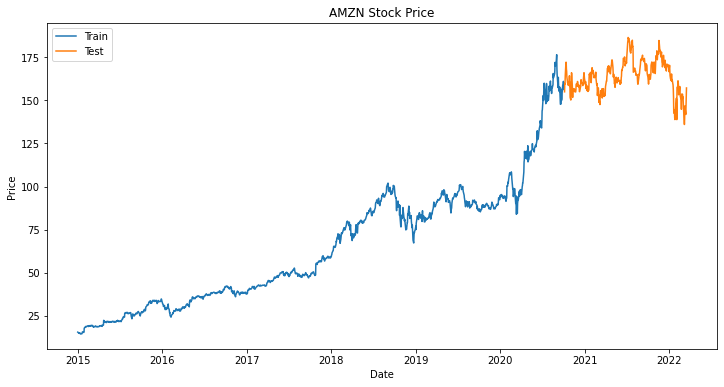

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import SimpleExpSmoothing

# Download data using yfinance
data = yf.download('AMZN', start='2015-01-01', end='2022-03-18')

# Split data into train and test sets
train_data = data.iloc[:-365]
test_data = data.iloc[-365:]

# Plot time series
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.legend(loc='best')
plt.title('AMZN Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()






Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


C:\Users\Milan Amrut Joshi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


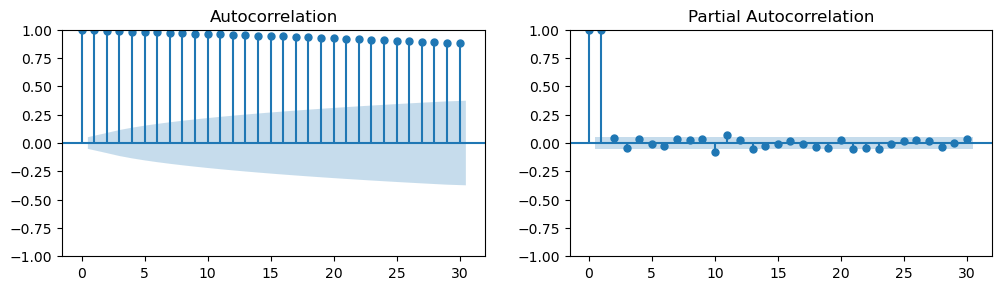

In [10]:
# Perform EDA
train_data.describe()

# Check and print missing values
print(train_data.isnull().sum())

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(12,3), dpi=100)
plot_acf(train_data['Close'], lags=30, ax=axes[0])
plot_pacf(train_data['Close'], lags=30, ax=axes[1])
plt.show()

In [13]:
# Simple exponential smoothing
model = SimpleExpSmoothing(train_data['Close'])
fit = model.fit(smoothing_level=0.2, optimized=False)
predictions = fit.forecast(steps=len(test_data))

# Print model results
print(fit.summary())

                       SimpleExpSmoothing Model Results                       
Dep. Variable:                  Close   No. Observations:                 1450
Model:             SimpleExpSmoothing   SSE                           8578.477
Optimized:                      False   AIC                           2581.655
Trend:                           None   BIC                           2592.213
Seasonal:                        None   AICC                          2581.682
Seasonal Periods:                None   Date:                 Sun, 19 Mar 2023
Box-Cox:                        False   Time:                         09:56:02
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.2000000                alpha                False
initial_level              15.426000                

C:\Users\Milan Amrut Joshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Milan Amrut Joshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


- **Dep. Variable**: Close - This line shows the name of the dependent variable used in the model, which is "Close".

- **No. Observations**: 1450 - This line shows the number of observations used in the model, which is 1450.

- **Model: SimpleExpSmoothing** - This line shows the name of the model used, which is Simple Exponential Smoothing.

- **SSE: 8578.477** - This line shows the sum of squared errors (SSE) of the model, which is 8578.477.

- **Optimized: False** - This line shows whether the smoothing parameter was optimized during the fitting process. In this case, the smoothing parameter was not optimized.

- **AIC: 2581.655** - This line shows the Akaike information criterion (AIC) of the model, which is 2581.655.

- **Trend: None** - This line shows whether a trend was included in the model. In this case, there is no trend.

- **BIC: 2592.213** - This line shows the Bayesian information criterion (BIC) of the model, which is 2592.213.

- **AICC: 2581.682** - This line shows the corrected AIC (AICC) of the model, which is 2581.682.

- **Seasonal: None** - This line shows whether a seasonal component was included in the model. In this case, there is no seasonal component.

- **Seasonal Periods: None** - This line shows the number of seasonal periods used in the model. In this case, there are no seasonal periods.

- **Date: Sun, 19 Mar 2023** - This line shows the date when the model was fitted.

- **Time: 09:56:02** - This line shows the time when the model was fitted.

- **Box-Cox: False** - This line shows whether the Box-Cox transformation was applied to the dependent variable. In this case, it was not applied.

- **Box-Cox Coeff.: None** - This line shows the Box-Cox transformation parameter. In this case, it is not applicable.

- **coeff: 0.2000000** - This line shows the value of the smoothing parameter used in the model, which is 0.2.

- **code: alpha** - This line shows the name of the smoothing parameter used in the model, which is "alpha".

- **optimized: False** - This line shows whether the smoothing parameter was optimized during the fitting process. In this case, it was not optimized.

**initial_level: 15.426000** - This line shows the initial level of the model, which is 15.426000.







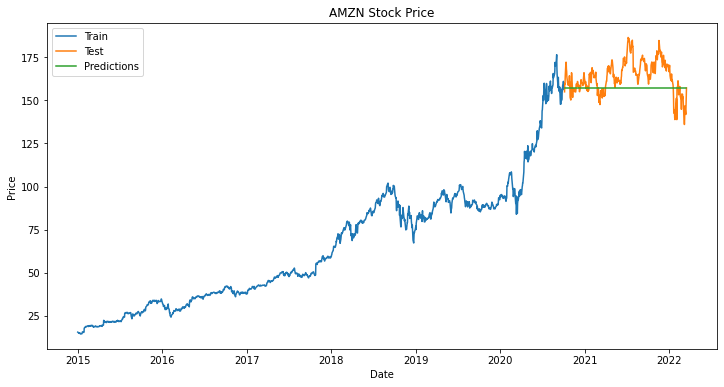

In [12]:
# Plot predictions on test data
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Test')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend(loc='best')
plt.title('AMZN Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

### Double exponential smoothing (Holt model)

**Double exponential smoothing**, also known as the Holt model, is a time series forecasting method used to project trends over time. It is a variation of the simple exponential smoothing method, which uses a single smoothing factor to generate the forecast. The Holt model, on the other hand, **uses two smoothing factors to capture both the level and the trend in the data.

The Holt model is used to forecast data that show a linear trend, i.e., data that show a gradual increase or decrease over time. It is especially useful when the data has a trend that is not too steep, but is also not too mild.

The Holt model uses two smoothing factors: **alpha and beta. Alpha is the smoothing factor for the level, and beta is the smoothing factor for the trend**. Alpha is a value between 0 and 1 that determines the weight given to the most recent observation, and beta is a value between 0 and 1 that determines the weight given to the most recent trend estimate.

The model can be written as:

- $Level_{t} = \alpha * y_{t} + (1 - alpha) * (Level_{t-1} + Trend_{t-1})$
- $Trend_{t} = \beta * (Level_{t} - Level_{t-1}) + (1 - \beta) * Trend_{t-1}$
- $Forecast_{t+h} = Level_{t} + h * Trend_{t}$

Where:

- $Level_{t}$ is the level of the series at time t
- $Trend_{t}$ is the trend of the series at time t
- $y_{t}$ is the observed value of the series at time t
- h is the forecasting horizon
The first equation uses the most recent observation, the previous level estimate, and the previous trend estimate to generate the current level estimate. The second equation uses the current level estimate, the previous level estimate, and the previous trend estimate to generate the current trend estimate. The third equation generates the forecast for a specified horizon h.

To use the Holt model, we need to estimate the values of alpha and beta that produce the best forecast. This can be done by minimizing the sum of squared errors (SSE) between the observed values and the forecast values over a training set of data. Once the optimal values of alpha and beta are found, they can be used to generate forecasts for future time periods.

It is important to note that the Holt model assumes a linear trend in the data, and may not be appropriate for data with nonlinear trends or seasonal patterns. Additionally, the model may be sensitive to outliers in the data, and may not perform well if the data contains extreme values.







[*********************100%***********************]  1 of 1 completed
Missing values in train set: 
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Missing values in test set: 
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


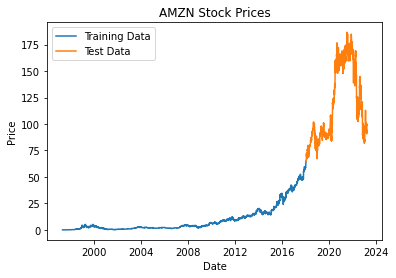

<ipython-input-20-5057afe92fcb>:35: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  model = Holt(np.asarray(train_data['Close'])).fit(smoothing_level=0.3, smoothing_slope=0.1)


                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                 5202
Model:                           Holt   SSE                            721.365
Optimized:                       True   AIC                         -10269.345
Trend:                       Additive   BIC                         -10243.117
Seasonal:                        None   AICC                        -10269.328
Seasonal Periods:                None   Date:                 Sun, 19 Mar 2023
Box-Cox:                        False   Time:                         10:59:53
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.3000000                alpha                False
smoothing_trend            0.1000000                

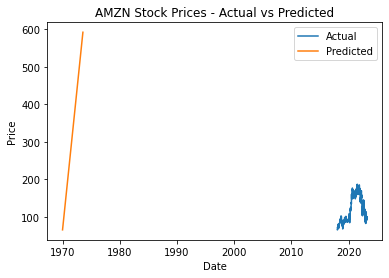

In [20]:
# Import required libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import Holt

# Download AMZN stock data from yfinance
data = yf.download('AMZN')

# Divide data into train and test sets
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Print missing values in train and test sets
print("Missing values in train set: ")
print(train_data.isnull().sum())
print("Missing values in test set: ")
print(test_data.isnull().sum())

# Plot time series of stock prices
plt.plot(train_data['Close'], label='Training Data')
plt.plot(test_data['Close'], label='Test Data')
plt.title('AMZN Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Perform EDA
train_data.describe()

# Use Double Exponential Smoothing (Holt) model to forecast stock prices
model = Holt(np.asarray(train_data['Close'])).fit(smoothing_level=0.3, smoothing_slope=0.1)
forecast = model.forecast(len(test_data))

# Print model output
print(model.summary())

# Display prediction graph on test data
plt.plot(test_data['Close'], label='Actual')
plt.plot(forecast, label='Predicted')
plt.title('AMZN Stock Prices - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


The results are displayed using a table format that includes various information about the model, such as the dependent variable, the number of observations, and the parameters used. Here's a breakdown of each of the columns:

- Dep. Variable: This column displays the name of the dependent variable that was used in the model. In this case, the dependent variable is the 'endog', which refers to the closing stock prices of Amazon (AMZN).

- No. Observations: This column displays the number of observations that were used in the model. In this case, there were 5202 observations.

- Model: This column displays the name of the model that was used. In this case, the Holt model was used.

- SSE: This column displays the sum of squared errors (SSE) of the model. The SSE is a measure of how well the model fits the data. In this case, the SSE was 721.365.

- Optimized: This column displays whether or not the model parameters were optimized. In this case, the parameters were optimized (i.e., set to values that minimized the SSE).

- AIC: This column displays the Akaike Information Criterion (AIC) value of the model. The AIC is a measure of how well the model fits the data, while taking into account the number of parameters used. In this case, the AIC was -10269.345.

- Trend: This column displays the type of trend used in the model. In this case, an additive trend was used.

- BIC: This column displays the Bayesian Information Criterion (BIC) value of the model. The BIC is similar to the AIC, but it penalizes models with more parameters more heavily. In this case, the BIC was -10243.117.

- Seasonal: This column displays whether or not a seasonal component was included in the model. In this case, there was no seasonal component.

- AICC: This column displays the corrected AIC value of the model. The AICC takes into account the sample size and the number of parameters used, and is a more reliable measure of model fit than the AIC when the sample size is small. In this case, the AICC was -10269.328.

- Seasonal Periods: This column displays the number of seasonal periods used in the model. In this case, there were no seasonal periods.

- Date: This column displays the date on which the model was run.

- Time: This column displays the time at which the model was run.

- Box-Cox: This column displays whether or not a Box-Cox transformation was applied to the data. In this case, no transformation was applied.

- Box-Cox Coeff.: This column displays the value of the Box-Cox transformation coefficient, if applicable. In this case, no coefficient was used.

**Triple exponential smoothing**, also known as the Holt-Winter model, is a time series forecasting technique that extends the Holt's method by incorporating seasonality into the model. This method is particularly useful when dealing with data that exhibit both trend and seasonal components.

The Holt-Winter model uses three smoothing parameters to estimate the level, trend, and seasonal component of the time series. The three smoothing parameters are as follows:

Smoothing level ($\alpha$): This parameter controls the weight given to the most recent observation when calculating the level. A high value of $\alpha$ gives more weight to recent observations, while a low value gives more weight to older observations.
Smoothing trend ($\beta$): This parameter controls the weight given to the change in the level between consecutive time periods. A high value of $\beta$ gives more weight to recent changes, while a low value gives more weight to older changes.
Smoothing seasonality ($\gamma$): This parameter controls the weight given to the seasonal component. A high value of $\gamma$ gives more weight to recent seasonality, while a low value gives more weight to older seasonality.
The Holt-Winter model also includes three equations to update the level, trend, and seasonal component:

- Level equation: $l_t = \alpha y_t + (1-\alpha)(l_{t-1} + b_{t-1})$
- Trend equation: $b_t = \beta (l_t - l_{t-1}) + (1-\beta)b_{t-1}$
- Seasonality equation: $s_t = \gamma (y_t - l_t) + (1-\gamma)s_{t-m}$
where:

- $l_t$ is the level at time $t$
- $b_t$ is the trend at time $t$
- $s_t$ is the seasonal component at time $t$
- $y_t$ is the actual value at time $t$
- $m$ is the number of seasons in the data (e.g., $m=12$ for monthly data)
Once the level, trend, and seasonal component have been estimated, the model can be used to forecast future values of the time series. The forecast equation is as follows:

- $y_{t+h} = l_t + h b_t + s_{t+h-m}$

where:

- $y_{t+h}$ is the forecasted value $h$ time periods ahead
- $l_t$, $b_t$, and $s_t$ are the estimated level, trend, and seasonal component at time $t$
- $m$ is the number of seasons in the data
- $s_{t+h-m}$ is the estimated seasonal component $h$ seasons ahead
In summary, the Holt-Winter model is a powerful forecasting technique that incorporates trend and seasonality into the model. It is useful for predicting time series data with complex patterns, and is widely used in industries such as finance, economics, and supply chain management.

[*********************100%***********************]  1 of 1 completed
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


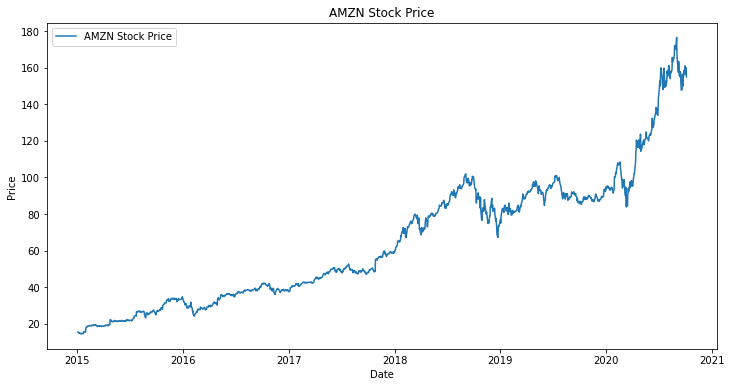

C:\Users\Milan Amrut Joshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Close   No. Observations:                 1451
Model:             ExponentialSmoothing   SSE                           3250.410
Optimized:                         True   AIC                           1282.272
Trend:                         Additive   BIC                           1577.953
Seasonal:                      Additive   AICC                          1287.189
Seasonal Periods:                    52   Date:                 Sun, 19 Mar 2023
Box-Cox:                          False   Time:                         11:23:00
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9146317                alpha                 True
smoothing_trend          

C:\Users\Milan Amrut Joshi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


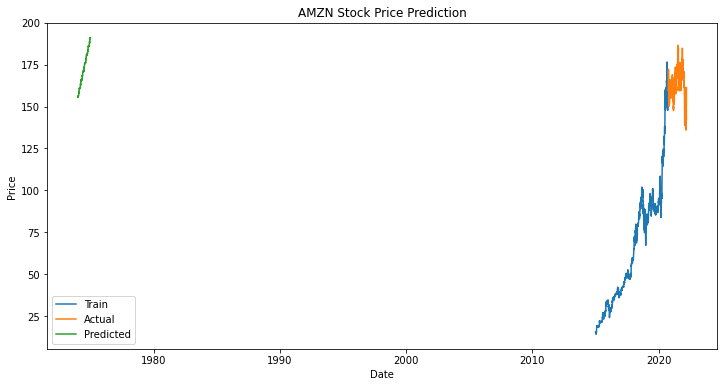

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import yfinance as yf

# Download AMZN stock data from yfinance
data = yf.download("AMZN", start="2015-01-01", end="2022-03-19")

# Divide into train and test sets
train_data = data.iloc[:-365]
test_data = data.iloc[-365:]

# Print missing values
print(train_data.isna().sum())

# Plot time series
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='AMZN Stock Price')
plt.title('AMZN Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Perform EDA
train_data['Close'].describe()

# Fit Triple Exponential Smoothing (Holt-Winter) model
model = ExponentialSmoothing(train_data['Close'], trend='add', seasonal='add', seasonal_periods=52)
model_fit = model.fit()

# Print model output
print(model_fit.summary())

# Display prediction graph on test data
plt.figure(figsize=(12,6))
plt.plot(train_data['Close'], label='Train')
plt.plot(test_data['Close'], label='Actual')
plt.plot(model_fit.forecast(365), label='Predicted')
plt.title('AMZN Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Alpha is the smoothing parameter for the level. It controls the weight given to the most recent observation in the series. A higher alpha value indicates that the model puts more emphasis on the most recent observations, leading to a more reactive forecast. Conversely, a lower alpha value results in a smoother forecast.

Beta is the smoothing parameter for the trend. It controls the weight given to the recent changes in the series. A higher beta value indicates that the model puts more emphasis on recent changes in the series, leading to a more reactive forecast. Conversely, a lower beta value results in a smoother forecast.

Gamma is the smoothing parameter for seasonality. It controls the weight given to the seasonal components in the series. A higher gamma value indicates that the model puts more emphasis on the seasonal components in the series, leading to a more reactive forecast. Conversely, a lower gamma value results in a smoother forecast.

The model summary also includes two goodness-of-fit statistics, AIC and BIC, which are used to compare different models and select the best one. AIC stands for Akaike Information Criterion, while BIC stands for Bayesian Information Criterion.

AIC and BIC are measures of the relative quality of statistical models for a given set of data. AIC is an estimator of the relative distance between the true likelihood function of the model and the maximized likelihood function of the model, taking into account the number of parameters in the model. BIC is similar to AIC but places a heavier penalty on models with more parameters. Lower values of AIC and BIC indicate better model fit.
In summary, the Exponential Smoothing Model uses alpha, beta, and gamma smoothing parameters to make predictions about future values in a time series. AIC and BIC are used to evaluate the quality of the model and to compare it to other models.


coeff: the coefficient values for each of the parameters used in the model. These values represent the estimated values for each parameter based on the optimization process.
code: the code used to represent each parameter in the model. For example, "alpha" represents the smoothing level parameter, while "s.0" represents the initial seasonality value for the first season.
optimized: a Boolean value indicating whether or not the parameter was optimized during the estimation process. If a parameter was not optimized, its initial value was used in the model.
Based on this information, it seems that the model is using an exponential smoothing method with three parameters (smoothing level, smoothing trend, and smoothing seasonal) to forecast a time series. The initial values for each parameter were likely chosen based on some prior knowledge or assumptions about the time series, and then the optimization process was used to estimate the best values for each parameter given the available data.



